In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('mushrooms.csv', sep=',')

In [4]:
dataset.shape

(8124, 23)

In [5]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
# Các biến phân loại không tồn tại mới quan hệ thứ tự
# => Chuẩn hóa bàng one hot encoder

In [7]:
y = dataset['class']
x = dataset.drop(['class'],axis=1)
x = pd.get_dummies(x)

In [8]:
x.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [10]:
# trong trường hợp có quá nhiều cột dự liệu nên dùng dummy encoder để tạo các cột cần thiết mà không trùng lắp
feature = pd.get_dummies(x, drop_first=True)
target = y

In [11]:
feature.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
# đếm theo loại
occ = target.value_counts()
occ

e    4208
p    3916
Name: class, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target,
                                                   test_size=0.3,
                                                   random_state=42)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.validation import column_or_1d

In [15]:
tree_n = DecisionTreeClassifier(criterion='entropy') 
tree_n.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [17]:
from IPython.display import Image
from sklearn import tree
import pydotplus

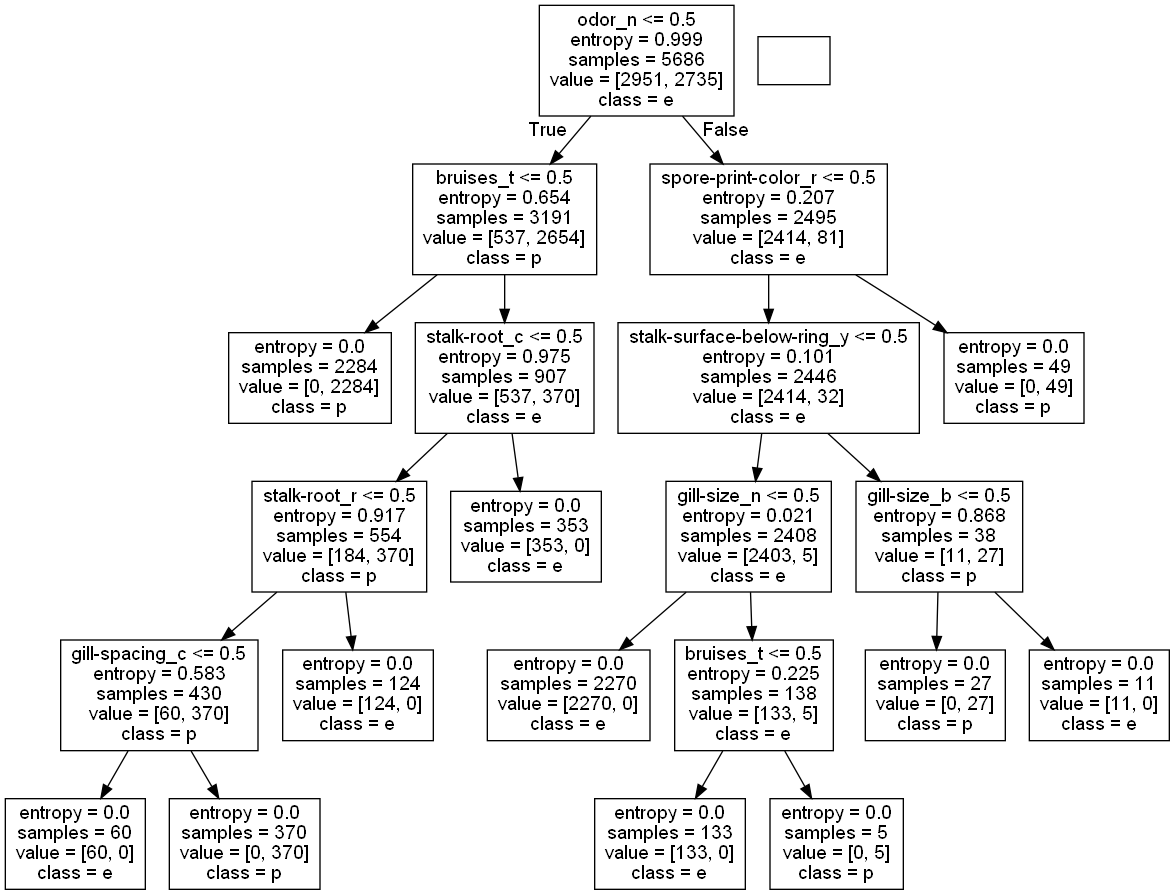

In [20]:
dot_data = tree.export_graphviz(tree_n, out_file=None,
                               feature_names=feature.columns,
                               class_names=['e','p'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [21]:
# Kiểm tra độ chính xác
print("The training prediction accuracy is:",
     tree_n.score(X_train, y_train)*100,'%')
print("The testing prediction accuracy is:",
     tree_n.score(X_test, y_test)*100,'%')

The training prediction accuracy is: 100.0 %
The testing prediction accuracy is: 100.0 %


In [22]:
# đánh giá model

In [23]:
y_pred = tree_n.predict(X_test)

In [24]:
yTrain_pred = tree_n.predict(X_train)

In [25]:
# Xem kết quả thống kê
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1257    0]
 [   0 1181]]
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



### Nhận xét
- Cả train và test đều có score cao, không bị overfitting/underfitting
- => Model phù hợp

## Apply pipeline

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [28]:
dataset1 = pd.read_csv('mushrooms.csv', sep=',')

In [30]:
y = dataset1['class']
X = dataset1.drop(['class'], axis=1)

In [31]:
from sklearn.model_selection import train_test_split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=42)


In [32]:
one_hot = OneHotEncoder(drop='first')

In [33]:
tree_p = DecisionTreeClassifier(criterion='entropy')

In [36]:
pipe = Pipeline([('one_hot', OneHotEncoder(drop='first')),
                 ('tree_p', DecisionTreeClassifier(criterion='entropy'))])

In [37]:
pipe.fit(X_train_p, y_train_p)

Pipeline(steps=[('one_hot', OneHotEncoder(drop='first')),
                ('tree_p', DecisionTreeClassifier(criterion='entropy'))])

In [38]:
pipe.score(X_test_p, y_test_p)

1.0

In [39]:
pipe.score(X_train_p, y_train_p)

1.0

In [40]:
# Model có kết quả tốtm không bị underfitting, overfitting

In [41]:
y_hat_p = pipe.predict(X_test_p)

In [42]:
print(confusion_matrix(y_test_p, y_hat_p))
print(classification_report(y_test_p, y_hat_p))

[[1257    0]
 [   0 1181]]
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [43]:
# Model có độ chính xác cao


In [44]:
pipe['one_hot']

OneHotEncoder(drop='first')

In [45]:
pipe['tree_p']

DecisionTreeClassifier(criterion='entropy')

In [ ]:
from IPython.display import Image
from sklearn import tree
import pydotplus

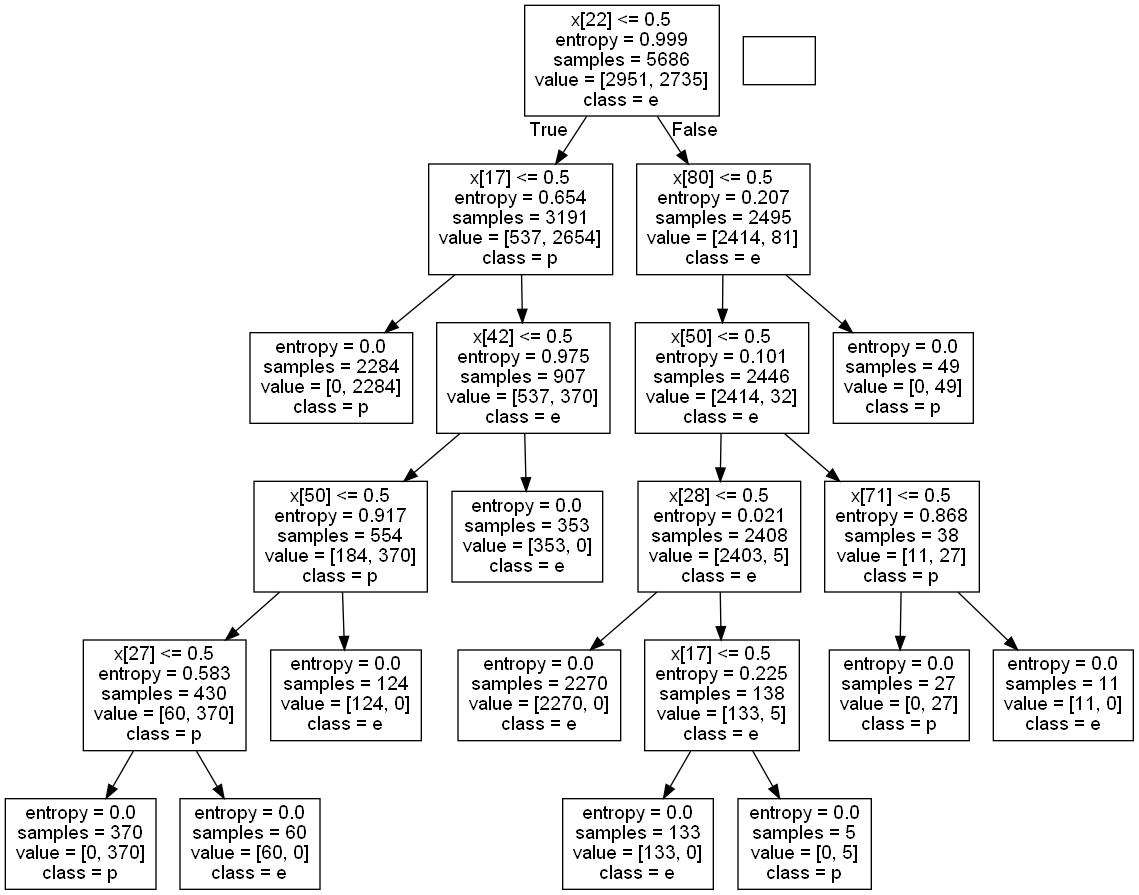

In [46]:
dot_data_1 = tree.export_graphviz(pipe['tree_p'], out_file=None,
                               class_names=['e','p'])
graph_1 = pydotplus.graph_from_dot_data(dot_data_1)
Image(graph_1.create_png())